In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

mnist_df = pd.read_csv('./data/train.csv')

X = mnist_df.drop('label', axis=1).to_numpy()
y = mnist_df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [3]:
class Model(nn.Module):
    def __init__(self, in_layer=784, hid1_layer=800, hid2_layer=130, hid3_layer=80, out_layer=10):
        super().__init__()
        self.fc1 = nn.Linear(in_layer, hid1_layer)
        self.fc2 = nn.Linear(hid1_layer, hid2_layer)
        self.fc3 = nn.Linear(hid2_layer, hid3_layer)
        self.out = nn.Linear(hid3_layer, out_layer)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        
        return x

In [4]:
model = Model()

In [5]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)

In [6]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=784, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=130, bias=True)
  (fc3): Linear(in_features=130, out_features=80, bias=True)
  (out): Linear(in_features=80, out_features=10, bias=True)
)>

In [7]:
epochs = 130
losses = []

for i in range(epochs):
    # Forward propagation
    y_pred = model.forward(X_train)

    # Measure loss
    loss = criterion(y_pred, y_train)

    # Keep track of losses
    losses.append(loss.detach().numpy())

    # Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch {i}: loss = {loss}')

    
    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0: loss = 6.248018264770508
Epoch 10: loss = 1.5609943866729736
Epoch 20: loss = 0.7479301691055298
Epoch 30: loss = 0.42937538027763367
Epoch 40: loss = 0.3110857605934143
Epoch 50: loss = 0.3085169792175293
Epoch 60: loss = 0.21670562028884888
Epoch 70: loss = 0.18540270626544952
Epoch 80: loss = 0.1700865775346756
Epoch 90: loss = 0.14375784993171692
Epoch 100: loss = 0.13606931269168854
Epoch 110: loss = 0.11928346753120422
Epoch 120: loss = 0.10863900184631348


Text(0, 0.5, 'Loss')

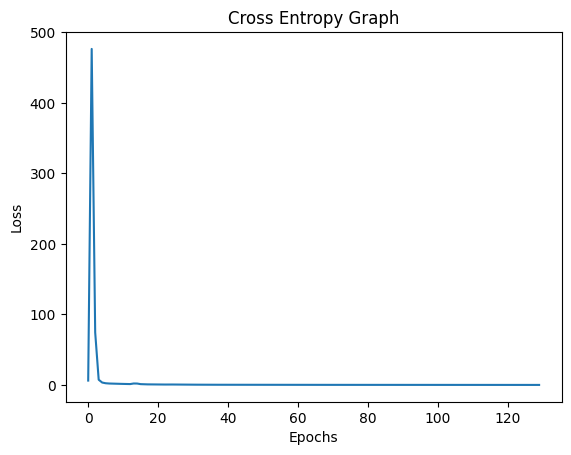

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)
plt.title('Cross Entropy Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [9]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test) # get loss/error of y_eval

print(float(loss))

0.15296949446201324


In [10]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if (torch.argmax(y_val) == y_test[i]):
            correct +=  1

print(f'Accuracy: {(correct/len(y_test)) * 100:.2f}%')

Accuracy: 95.50%
